# Div and conquer algorithm plus OpenCV.

Implementation of divide big pictures

https://towardsdatascience.com/images-and-masks-splitting-into-multiple-pieces-in-python-with-google-colab-2f6b2ddcb322

You need download two pictures from Imgur and upload to folder structure of this project:


*   https://i.imgur.com/IrzTytZ.jpg
*   https://i.imgur.com/gahd5nQ.png

Second example:

* https://i.imgur.com/BB1Hz0c.jpg
* https://i.imgur.com/zAQQUML.png

Remember delete the pictures in Imput dir, and replace with other examples.

Folder structure:

*   File Folder\
   + Imput dir\
      x Images\ IrzTytZ.jpg

      x Masks\ gahd5nQ.png
   + Output dir\
      x Images\ slice pictures result

      x Masks\ slice pictures result


In [73]:
import os
import sys
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
# for impaint
import cv2

# Mount the Google Drive (with images and masks) to Google Colab:

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Remember

Sometimes Colab disconect from Drive. 
So you need launch again the above cell.
But not launch again in same session the below cell.

In [75]:
%cd gdrive/My Drive/File Folder

[Errno 2] No such file or directory: 'gdrive/My Drive/File Folder'
/content/gdrive/My Drive/File Folder


# Functions

A useful function for creating a new directory and recursively deleting the contents of an existing one:

In [76]:
def dir_create(path):
    """Dir create function.
        
        Create and clean a directory recrusive,
 
    """
    if (os.path.exists(path)) and (os.listdir(path) != []):
        shutil.rmtree(path)
        os.makedirs(path)
    if not os.path.exists(path):
        os.makedirs(path)

The crop function that goes over the original image are adjusted to the original image limit and contain the original pixels:

In [77]:
def crop(input_file, height, width):
    img = Image.open(input_file)
    img_width, img_height = img.size
    for i in range(img_height//height):
        for j in range(img_width//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield img.crop(box)

The function for splitting images and masks into smaller parts (the height and width of the cropping window, and the starting number are taken as input parameters):

In [78]:
%xmode verbose

Exception reporting mode: Verbose


In [82]:
def split(inp_img_dir, inp_msk_dir, out_dir, height, width, 
          start_num):
    image_dir = os.path.join(out_dir, 'images')
    mask_dir = os.path.join(out_dir, 'masks')
    dir_create(out_dir)
    dir_create(image_dir)
    dir_create(mask_dir)
    img_list = [f for f in
                os.listdir(inp_img_dir)
                if os.path.isfile(os.path.join(inp_img_dir, f))]
    file_num = 0
    for infile in img_list:
        print(infile)
        infile_path = os.path.join(inp_img_dir, infile)
        for k, piece in enumerate(crop(infile_path,
                                       height, width), start_num):
            img = Image.new('RGB', (height, width), 255)
            img.paste(piece)
            img_path = os.path.join(image_dir, 
                                    infile.split('.')[0]+ '_'
                                    + str(k).zfill(5) + '.png')
            img.save(img_path)

    img_list = [f for f in
                os.listdir(inp_msk_dir)
                if os.path.isfile(os.path.join(inp_msk_dir, f))]
    file_num = 0
    for infile in img_list:
        print(infile)
        infile_path = os.path.join(inp_msk_dir,
                                   infile.split('.')[0] + '.png')
        for k, piece in enumerate(crop(infile_path,
                                       height, width), start_num):
            msk = Image.new('RGB', (height, width), 255)
            msk.paste(piece)
            msk_path = os.path.join(mask_dir,
                                    infile.split('.')[0] + '_'
                                    + str(k).zfill(5) + '.png')
            msk.save(msk_path)


Let’s set the necessary variables:

In [83]:
inp_img_dir = "./input_dir/images"
inp_msk_dir = "./input_dir/masks"
out_dir = "./output_dir"
height = 512
width = 512
start_num = 1

Let’s form a list of files with original images and masks and split them:


In [84]:
input_images_list = glob.glob(inp_img_dir + "/*.jpg")
input_masks_list = glob.glob(inp_msk_dir + "/*.png")

split(inp_img_dir, inp_msk_dir, out_dir, height, width, start_num)

IrzTytZ.jpg
gahd5nQ.png


As an example, two original images and masks are shown using the following code:

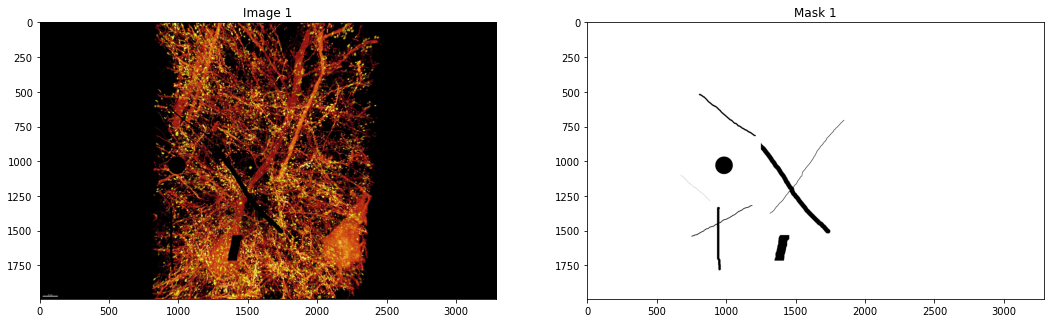

In [85]:
for i, (image_path, mask_path) in enumerate(zip(input_images_list,
                                                input_masks_list)):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(18, 9))
    image = mpimg.imread(image_path)
    mask = mpimg.imread(mask_path)
    ax1.set_title("Image " + str(i+1))
    ax1.imshow(image)
    ax2.imshow(mask)
    ax2.set_title("Mask " + str(i+1))

Using the following function, you can show all parts of the splitted image (divided into N parts):

In [98]:
def image_part_plotter(images_list, offset,rows='', cols=''):
    """Image part plotter function.

        This function received the variables:
        + A list of images
        + Offset number (don't touch!)
        + number of rows
        + number of columns (self regulated for the length of the image list)
        
    """
    fig = plt.figure(figsize=(12, 6))
    columns = cols
    rows = rows
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns*rows):
        # create subplot and append to ax
        img = mpimg.imread(images_list[i+offset])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title("Nº" + str(i+1))
        plt.imshow(img)
        plt.axis("off")
    plt.show() # Render the plot

We call again to Google Drive, and walk into output directory and images and masks. And get a list of divided pictures for future proccesing.

And procced to show.
In the Impairment Algo we need to call again to Google Drive and
repeat in a loop for the cacht of all Images and Masks for repair the tissue.

In [95]:
# This cell work together with cell 47
out_img_dir = "./output_dir/images"
out_msk_dir = "./output_dir/masks"

In [96]:
# We need this cell with the list of pictures and masks and iterate over the list
# and pass each pic in impairment code
output_images_list = glob.glob(out_img_dir + "/*.png")
output_masks_list = glob.glob(out_msk_dir + "/*.png")

# Next improvements:

Plug Div&conquer to Impairment code.

Add codecarbon module for detect computing and energy consumption graphics. This will be very important in future scale of recovery and get the metrics of energy/time.

Codecarbon:

*   https://pypi.org/project/codecarbon/
*   time module for correlation of computation/time



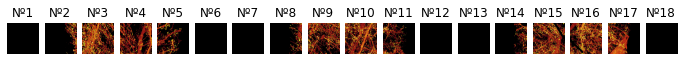

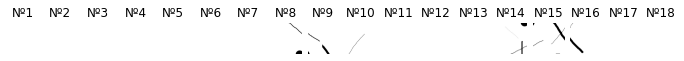

In [99]:
image_part_plotter(output_images_list,0,rows=1, cols=len(output_images_list))
image_part_plotter(output_masks_list, 0,rows=1, cols=len(output_masks_list))

# Mix slice and impaint methods.

Now we add new procedure for apply imagin inpainting. It's based in the article presented by Adrian Rosenbrock, author of PyImageSearch.
This is the link:
https://www.pyimagesearch.com/2020/05/18/image-inpainting-with-opencv-and-python/

We follow the guidelines of the work adapted to this projec
t.

In [110]:
# initialize the inpainting algorithm to be the Telea et al. method
option = 2
if option == 1:
  flags = cv2.INPAINT_TELEA
  # check to see if we should be using the Navier-Stokes (i.e., Bertalmio
  # et al.) method for inpainting
else:
  flags = cv2.INPAINT_NS

Now we combine in one function the call to folder structure
of output dir for read, impaint and show the pics.


In [111]:
def impaint_part_plotter(damage_list, mask_list, offset,rows='', cols=''):
    """Impaint part plotter function.

        This function received the variables:
        + A list of images
        + A list of masks
        + Offset number (don't touch!)
        + number of rows
        + number of columns (self regulated for the length of the image list)

        Then return a set of plotted and repaired by impainting pic slices.
        
    """
    fig = plt.figure(figsize=(12, 6))
    columns = cols
    rows = rows
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns*rows):
        #damages = mpimg.imread(damage_list[i+offset])
        #masks = mpimg.imread(mask_list[i+offset])
        # load the (1) input image (i.e., the image we're going to perform
        # inpainting on) and (2) the  mask which should have the same input
        # dimensions as the input image -- zero pixels correspond to areas
        # that *will not* be inpainted while non-zero pixels correspond to
        # "damaged" areas that inpainting will try to correct
        
        image = cv2.imread(damage_list[i+offset])
        mask = cv2.imread(mask_list[i+offset])
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        # perform inpainting using OpenCV
        radius = 30 # 5px
        output = cv2.inpaint(image, mask, radius, flags=flags)
        # create subplot and append to ax
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title("Nº" + str(i+1))
        plt.imshow(output)
        plt.axis("off")
    plt.show() # Render the plot

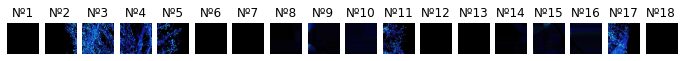

In [112]:
impaint_part_plotter(output_images_list,output_masks_list,0,rows=1, cols=len(output_images_list))

In [113]:
# load the (1) input image (i.e., the image we're going to perform
# inpainting on) and (2) the  mask which should have the same input
# dimensions as the input image -- zero pixels correspond to areas
# that *will not* be inpainted while non-zero pixels correspond to
# "damaged" areas that inpainting will try to correct
image = cv2.imread(image_path)
mask = cv2.imread(mask_path)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [116]:
# perform inpainting using OpenCV
radius = 30 # 5px
output = cv2.inpaint(image, mask, radius, flags=flags)

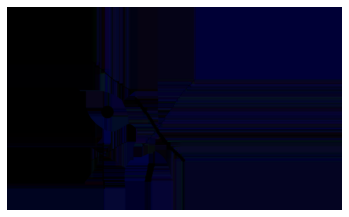

In [115]:
plt.imshow(output)
plt.axis("off")
plt.show()

# Note:

We need improove the tune of parameters for pictures with hihg damage for better performance and avoid bizarre states.